In [2]:
import torch 
import torch.nn as nn # nn contain all the neural network model 

import matplotlib.pyplot as plt

torch.__version__




'1.13.1'

In [3]:
# create "known" parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim =1)

y = weight * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# create train / test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# plot prediction function

def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data", )

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


    plt.legend(prop={"size": 18})
    

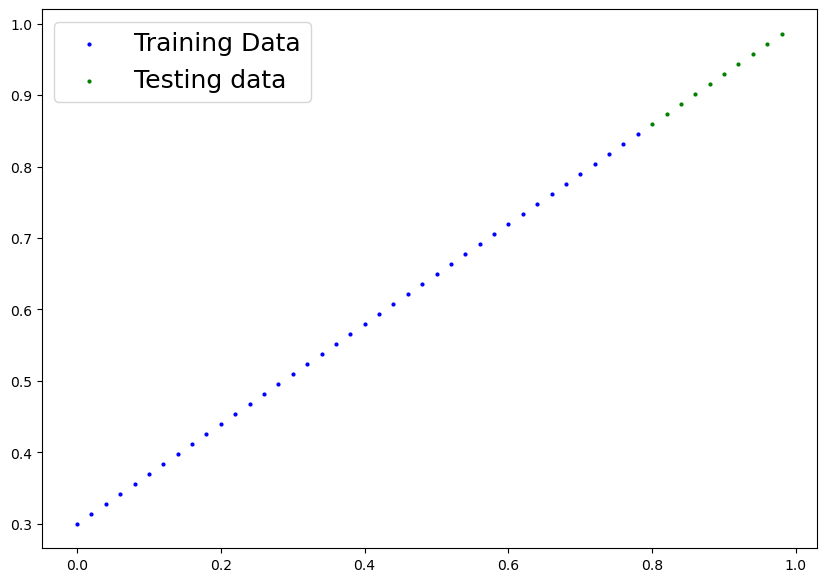

In [6]:
plot_predictions()

In [7]:
# Build modelling
# Linear Regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # initialize model parameters
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))


    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias


In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# making prediction using torch.inference.mode()

with torch.inference_mode():
    y_preds = model_0(X_test)

    

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


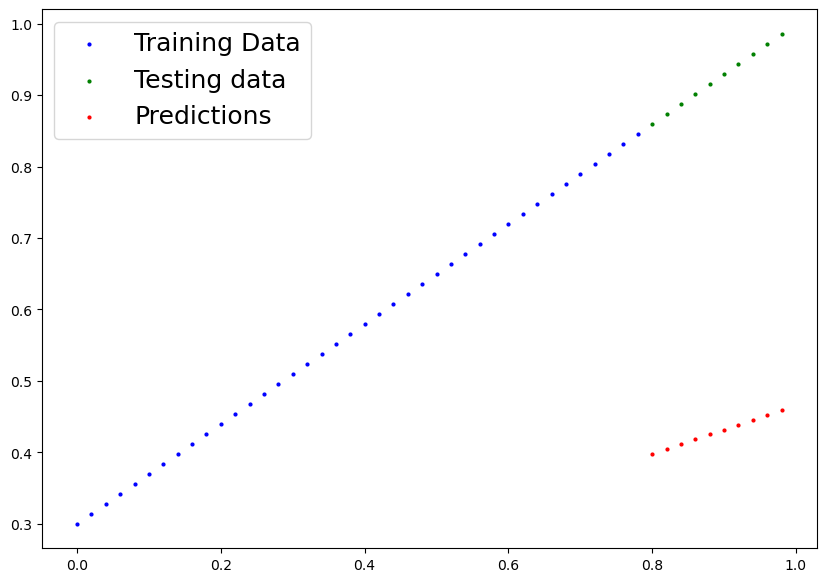

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [25]:
torch.manual_seed(42)

# how many times model will pass over data
epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        # prediction come in float data type...that's why
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")

    



Epoch: 0 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 10 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 20 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 30 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 40 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 50 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 60 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 70 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 80 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 90 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 100 | MAE train loss: 0.0025885067880153656 | MAE test loss: 0.008447891101241112
Epoch: 110 | MAE train loss: 0.0

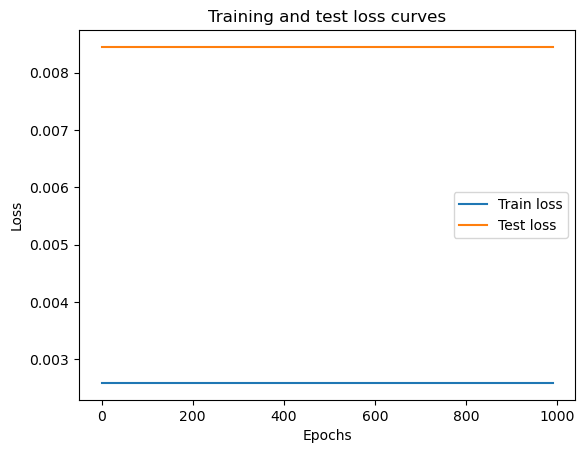

In [26]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [27]:
print(model_0.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
0.7 0.3


In [31]:
# making prediction with our trained model

model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds, y_test)

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


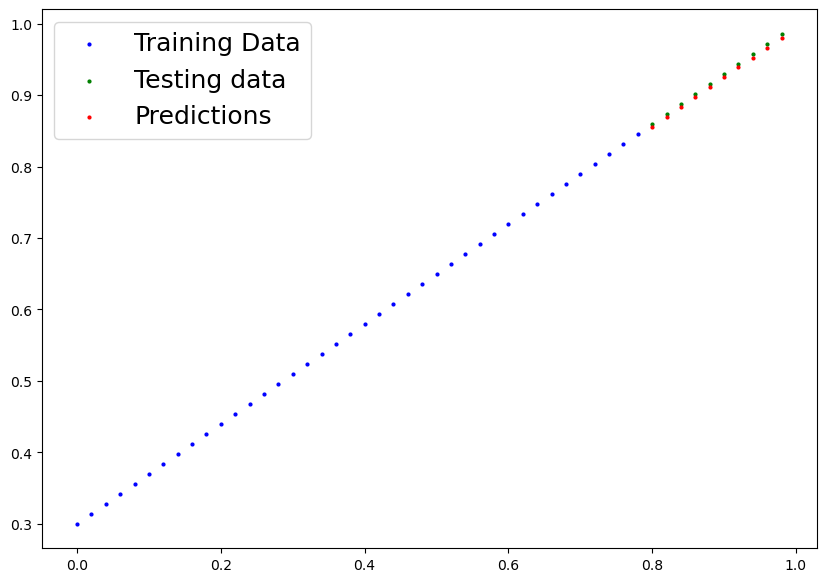

In [32]:
plot_predictions(predictions=y_preds)

In [34]:
# saving a pytorch model
from pathlib import Path

# model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [35]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-rw-r-- 1 kroman kroman 1207 Jan 18 07:49 models/01_pytorch_workflow_model_0.pth


In [36]:
# Loading saved pytorch model's state_dict()

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [38]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])